
# ITAI 2377 Lab 04: Deep Learning Data Preprocessing

**Instructor:** [Your Name]
**Date:** [Date]

## Introduction

Welcome to Lab 04!  We'll explore the critical role of data preprocessing in deep learning. Even though models can extract features, preprocessing is essential for optimal performance. We'll cover various data types and apply preprocessing techniques. Resources in Google Colab are limited, so efficient coding is key!

## Why Preprocess?

Why preprocess when models extract features?

*   **Standardization:** Models need consistent data formats and ranges.
*   **Noise/Errors:** Raw data is messy. Preprocessing cleans it up.
*   **Efficiency:** Cleaner data means faster training.
*   **Results:** Good preprocessing helps models perform their best.

Think of preprocessing as a personal trainer for your model.

## Data Types and Preprocessing Techniques

### 1. Image Data



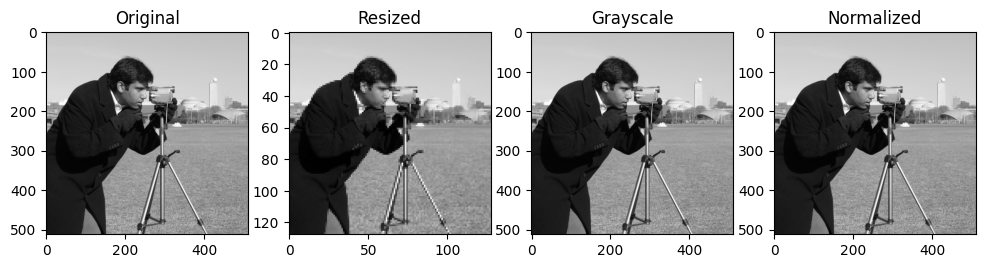

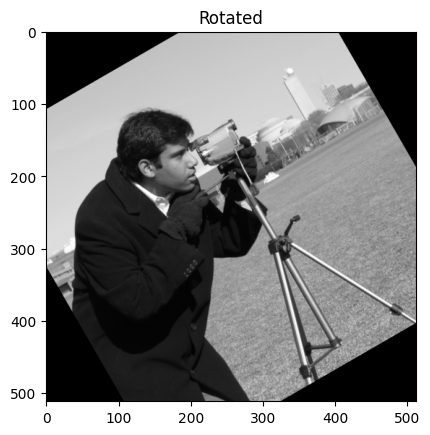

In [1]:
import cv2
import numpy as np
from skimage import data, img_as_float
import matplotlib.pyplot as plt

# Load a sample image (replace with your image path if you have one)
image = data.camera()  # Or use: image = cv2.imread("path/to/your/image.jpg")

# Resizing (Student Code: Resize the image to (128, 128))
# Hint: Use cv2.resize()
# YOUR CODE HERE
resized_image = cv2.resize(image, (128, 128))


# Color space conversion (to grayscale) - The image is already grayscale, so this is removed.
# gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_image = image # Use the original grayscale image


# Normalization (pixel values 0-1)
normalized_image = img_as_float(image)

# Display images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1, 4, 2), plt.imshow(resized_image, cmap='gray'), plt.title("Resized")
plt.subplot(1, 4, 3), plt.imshow(gray_image, cmap='gray'), plt.title("Grayscale")
plt.subplot(1, 4, 4), plt.imshow(normalized_image, cmap='gray'), plt.title("Normalized")
plt.show()

# Data Augmentation (rotation - Student Code: Rotate by 30 degrees)
# Hint: Use cv2.getRotationMatrix2D and cv2.warpAffine
angle = 30 #YOUR CODE HERE
rows, cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))

plt.imshow(rotated_image, cmap='gray'), plt.title("Rotated")
plt.show()

### 2. Text Data



In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True) # Download punkt_tab resource
nltk.download('averaged_perceptron_tagger', quiet=True) # Download averaged_perceptron_tagger for lemmatization


text = "This is a fun example sentence with stop words and punctuation!"

# Tokenization (lowercase)
tokens = word_tokenize(text.lower())

# Stop word removal (Student Code: Remove stop words and punctuation)
# Hint: Use the 'stop_words' set and list comprehension
stop_words = set(stopwords.words('english'))
# YOUR CODE HERE
filtered_tokens = [w for w in tokens if not w in stop_words and w not in string.punctuation]


# Lemmatization (Student Code: Lemmatize the filtered tokens)
# Hint: Use WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()
# YOUR CODE HERE
lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]


print("Original:", text)
print("Tokens:", tokens)
print("Filtered:", filtered_tokens)
print("Lemmatized:", lemmatized_tokens)

Original: This is a fun example sentence with stop words and punctuation!
Tokens: ['this', 'is', 'a', 'fun', 'example', 'sentence', 'with', 'stop', 'words', 'and', 'punctuation', '!']
Filtered: ['fun', 'example', 'sentence', 'stop', 'words', 'punctuation']
Lemmatized: ['fun', 'example', 'sentence', 'stop', 'word', 'punctuation']


### 3. Time Series Data



In [3]:
import pandas as pd
import numpy as np

# Sample data (with a missing value)
data = {'Date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05']),
        'Value': [10, 12, 15, np.nan, 18]}

df = pd.DataFrame(data)

# Missing value handling (Student Code: Use backward fill to fill missing values)
# Hint: Use fillna() with method='bfill'
# YOUR CODE HERE
df['Value'].fillna(method='bfill', inplace=True)

# Normalization (min-max scaling - Student Code: Normalize the 'Value' column)
# YOUR CODE HERE
min_val = df['Value'].min()
max_val = df['Value'].max()
df['Normalized'] = (df['Value'] - min_val) / (max_val - min_val)

print(df)

        Date  Value  Normalized
0 2024-01-01   10.0       0.000
1 2024-01-02   12.0       0.250
2 2024-01-03   15.0       0.625
3 2024-01-04   18.0       1.000
4 2024-01-05   18.0       1.000


/tmp/ipython-input-3069143717.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(method='bfill', inplace=True)
/tmp/ipython-input-3069143717.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Value'].fillna(method='bfill', inplace=True)


### 4. Optional: Video Data (Simplified)



Read and processed 10 frames.


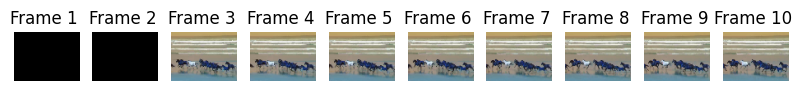

In [4]:
import cv2
import matplotlib.pyplot as plt # Import matplotlib

# Load a video (replace with your video path or a small sample video if possible)
video_path = "your_video.mp4"  # Replace with your video file path (or upload one to Colab)
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video")
else:
    frames = []
    max_frames_to_read = 10 # Read a maximum of 10 frames
    count = 0
    while cap.isOpened() and count < max_frames_to_read:
        ret, frame = cap.read()  # Read a single frame
        if not ret:
            break

        # Resize the frame (for faster processing - Student Code: Resize to (80, 60))
        # YOUR CODE HERE
        resized_frame = cv2.resize(frame, (80, 60))
        frames.append(resized_frame)
        count += 1

    cap.release()
    cv2.destroyAllWindows()

    print(f"Read and processed {len(frames)} frames.")

    # Optional: Display the first few processed frames
    if len(frames) > 0:
        plt.figure(figsize=(10, 5))
        for i in range(min(len(frames), 10)): # Display up to 5 frames
            plt.subplot(1, min(len(frames), 10), i + 1)
            plt.imshow(frames[i])
            plt.title(f"Frame {i + 1} ")
            plt.axis('off')
        plt.show()

### 5. Optional: Audio Data (Simplified)



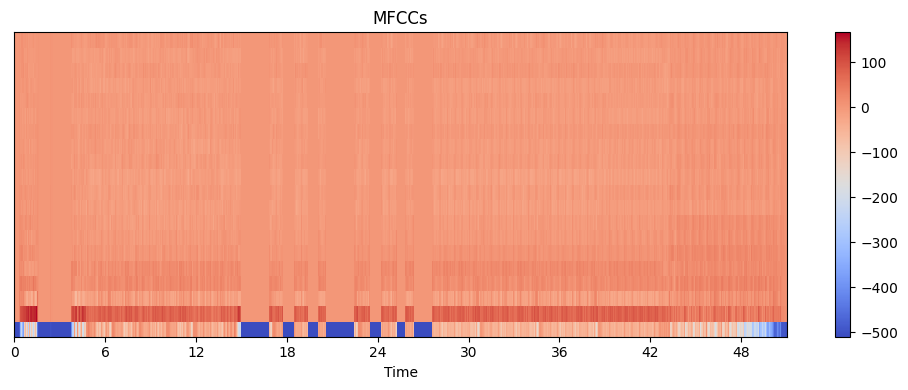

MFCCs shape: (20, 2198)
Normalized MFCCs shape: (20, 2198)


In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Load an audio file (replace with your audio path)
audio_path = "your_audio.wav"  # Replace with your audio file path (or upload one to Colab)

if os.path.exists(audio_path):
    y, sr = librosa.load(audio_path, duration=60)  # Load a maximum of 60 seconds

    # Feature extraction (MFCCs - Student Code: Extract 20 MFCCs)
    # Hint: Use librosa.feature.mfcc() with n_mfcc=20
    # YOUR CODE HERE
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Display MFCCs (optional)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.tight_layout()
    plt.show()

    # Normalize MFCCs (example)
    mfccs_normalized = (mfccs - np.mean(mfccs)) / np.std(mfccs)

    print("MFCCs shape:", mfccs.shape)
    print("Normalized MFCCs shape:", mfccs_normalized.shape)
else:
    print(f"Error: Audio file not found at '{audio_path}'. Please replace 'your_audio.wav' with the correct path to your audio file.")

**Tip:** Explore different methods for handling missing values (e.g., backward fill, interpolation).  Consider feature engineering techniques like creating lagged variables.

## Questions (Markdown Cell)

1.  Why is data preprocessing still important even with deep learning's feature extraction capabilities?
2.  Explain the difference between normalization and standardization. When would you choose one over the other?
3.  Describe a scenario where data augmentation would be particularly useful.
4.  What are some potential challenges or pitfalls to avoid during data preprocessing?  How can you mitigate them?
5.  Choose one of the data types covered in the lab (images, text, time series).  Describe a specific real-world application that uses deep learning and explain how preprocessing would be crucial for that application.

## Deliverables

*   **Completed Notebook (PDF):** This notebook with your code, outputs, and answers to the questions.
*   **Reflective Journal:** A short journal (1-2 pages) reflecting on your learning experience in this lab.  Consider the following prompts:
    *   What did you learn in this lab?
    *   What challenges did you encounter? How did you overcome them?
    *   Were there any concepts that you already knew?
    *   Did anything surprise you?
    *   What are some potential real-world applications of the preprocessing techniques you learned?
    *   What further learning or exploration would you like to pursue related to data preprocessing?

Remember to save your notebook with the outputs and convert it to PDF before submission. Good luck!
```

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119">https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119</a></li>
  </ol>
</div>